In [1]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 
from numpy.polynomial.polynomial import polyfit
from sklearn.utils import resample

import helperFunc as hf

# Functions

In [2]:
def getCorrSig_BiasSlope(Q1,Q2):
    
    rho,p = pearsonr(Q1,Q2)
    bias, slope = polyfit(Q1, Q2, 1)
    
    return (rho,p,bias,slope)

In [3]:
def getCorrBootstrap(QAll,tauTupleList,p,rewiringsTuple =(4000,4000),samples=100,repetitions = 1000):
    
    weightDist = ['normal','lognormal']
    rho = {}; pVal = {}; bias = {}; slope = {}; 

    for wD in weightDist:
        lenVars = len(tauTupleList[(wD,p)])
        rho[wD,p] = np.zeros((repetitions,lenVars)); pVal[wD,p] = np.zeros((repetitions,lenVars)) 
        bias[wD,p] = np.zeros((repetitions,lenVars)); slope[wD,p] = np.zeros((repetitions,lenVars))
        for ind,tauTuple in enumerate(tauTupleList[(wD,p)]):
        
            Q0,Q1,Q2 = QAll[wD,p][p,tauTuple,rewiringsTuple]
            for reps in np.arange(repetitions): 
                # prepare bootstrap sample
                Q1Sample,Q2Sample = resample(Q1, Q2, replace=True, n_samples=samples)
                rho[wD,p][reps,ind],pVal[wD,p][reps,ind],bias[wD,p][reps,ind],slope[wD,p][reps,ind] = getCorrSig_BiasSlope(Q1Sample,Q2Sample)        
        
    return rho,pVal,bias,slope

## Load Qrandom , Q4000 and Q8000 and calculate correlation for p = 0.2 for 200 repetitions
## Do bootstrap, selection with replacement

In [5]:
directoryQLoad ='data/ModularityValues/2tauRewirings/'
descr = 'Q0Q4000Q8000'
filePathQLoad= directoryQLoad + descr+'.pckl'
rewiringsTuple= (4000,4000)
p=0.2
(QAll,tauTupleList) = hf.loadVar(filePathQLoad) 

In [6]:
rho,pVal,bias,slope = getCorrBootstrap(QAll,tauTupleList,p,rewiringsTuple)

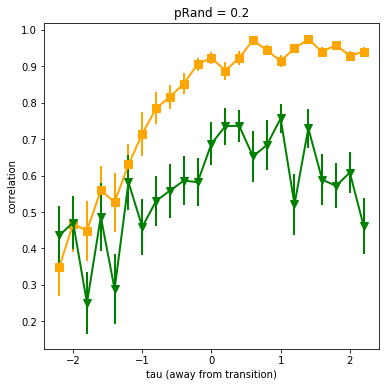

In [7]:
##CORRELATION

####################to GET THE X-AXIS TAUDIFF##############
w = 'normal'
lengthTauDiff = len(tauTupleList[(w,p)])
tauDiff = np.zeros(lengthTauDiff)
for indT in np.arange(lengthTauDiff):
    tauDiff[indT] = tauTupleList[(w,p)][indT][1] - tauTupleList[(w,p)][indT][0]
#######################################
weightDist = ['normal','lognormal'] 

ms = 8    
LW = 2
ylabel = 'correlation'
xLabel = 'tau (away from transition)'
colorsPlot = [ 'orange', 'green']
shapePoint = ['-s','-v']
shapePointNoLine = ['s','v']

plt.rcParams['figure.figsize'] = [6, 6]
fig = plt.figure(); 
ax = fig.add_subplot(1,1, 1)
for ind,wD in enumerate(weightDist):

    ttl = 'pRand = '+ str(p)
    plt.title(ttl)
    plt.xlabel(xLabel)
    #plt.xticks(taus, taus)
    #plt.ylim(ylimit)
    #plt.ylim((0, 0.6))
    plt.ylabel(ylabel)

    rhoStd = np.std(rho[wD,p], axis=0)
    rhoMean = np.mean(rho[wD,p], axis=0)
    ax.errorbar(tauDiff, rhoMean, rhoStd, mfc=colorsPlot[ind], mec=colorsPlot[ind], marker=shapePointNoLine[ind],markersize=ms,
                color=colorsPlot[ind],linewidth=LW, label=wD)       

